In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


### Etape 1

In [3]:
# 1. Charger le Dataset et afficher les premières lignes
df = pd.read_csv("Invistico_Airline.csv")

df.head()


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
# Afficher des informations générales sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
# Calculer des statistiques descriptives pour les variables numériques
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
# Détection des valeurs manquantes et aberrantes
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [7]:
numerical_features = ["Age",
                      "Flight Distance",
                      "Departure Delay in Minutes",
                      'Arrival Delay in Minutes',
                      'Seat comfort',
                      'Food and drink',
                      'On-board service',
                      'Leg room service',
                      'Inflight wifi service',
                      'Checkin service']

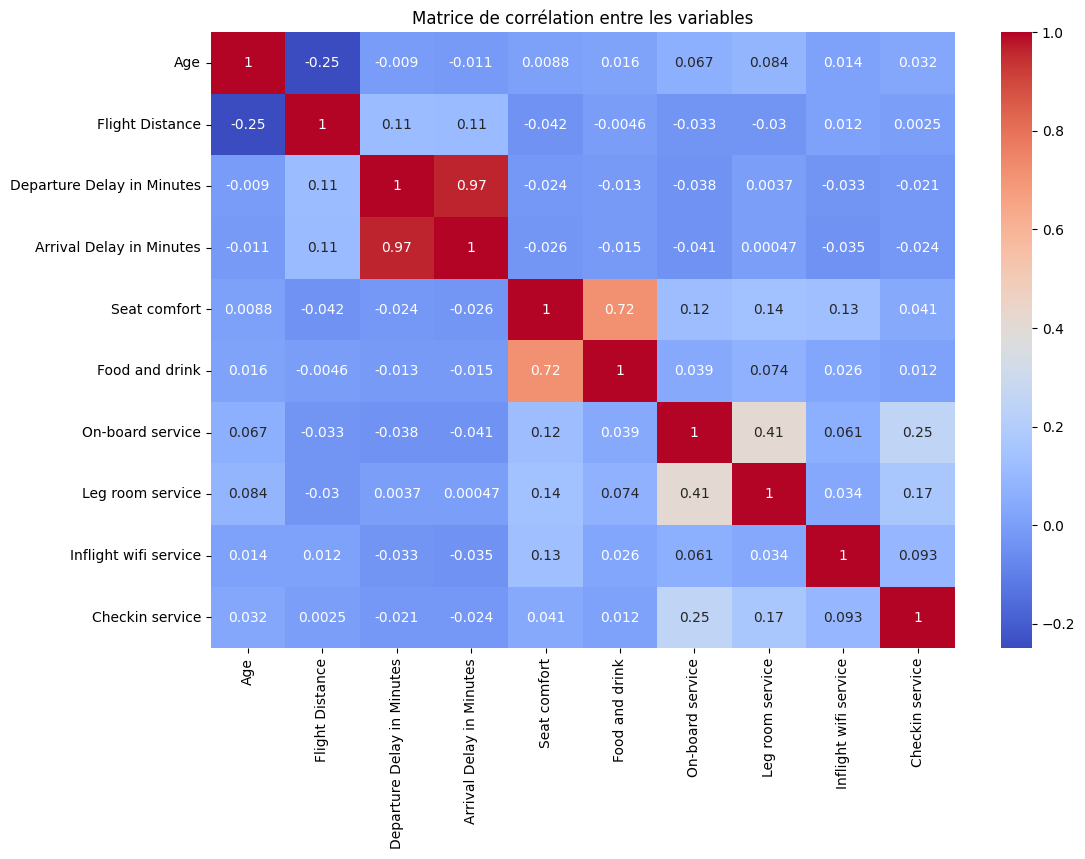

In [8]:
# Créer une heatmap des corrélations pour identifier les relations entre les variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables')
plt.show()


In [9]:
# Afficher la distribution pour les différentes classes
categorical_features = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort',
                       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                       'Inflight wifi service', 'Inflight entertainment', 'Online support',
                       'Ease of Online booking', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

for i in categorical_features:
    print(df[i].value_counts())
    print('-' * 50)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64
--------------------------------------------------
Gender
Female    65899
Male      63981
Name: count, dtype: int64
--------------------------------------------------
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
--------------------------------------------------
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
--------------------------------------------------
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
--------------------------------------------------
Seat comfort
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: count, dtype: int64
--------------------------------------------------
Departure/Arrival time convenient
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: count, dtype: int64
------------------------------------------

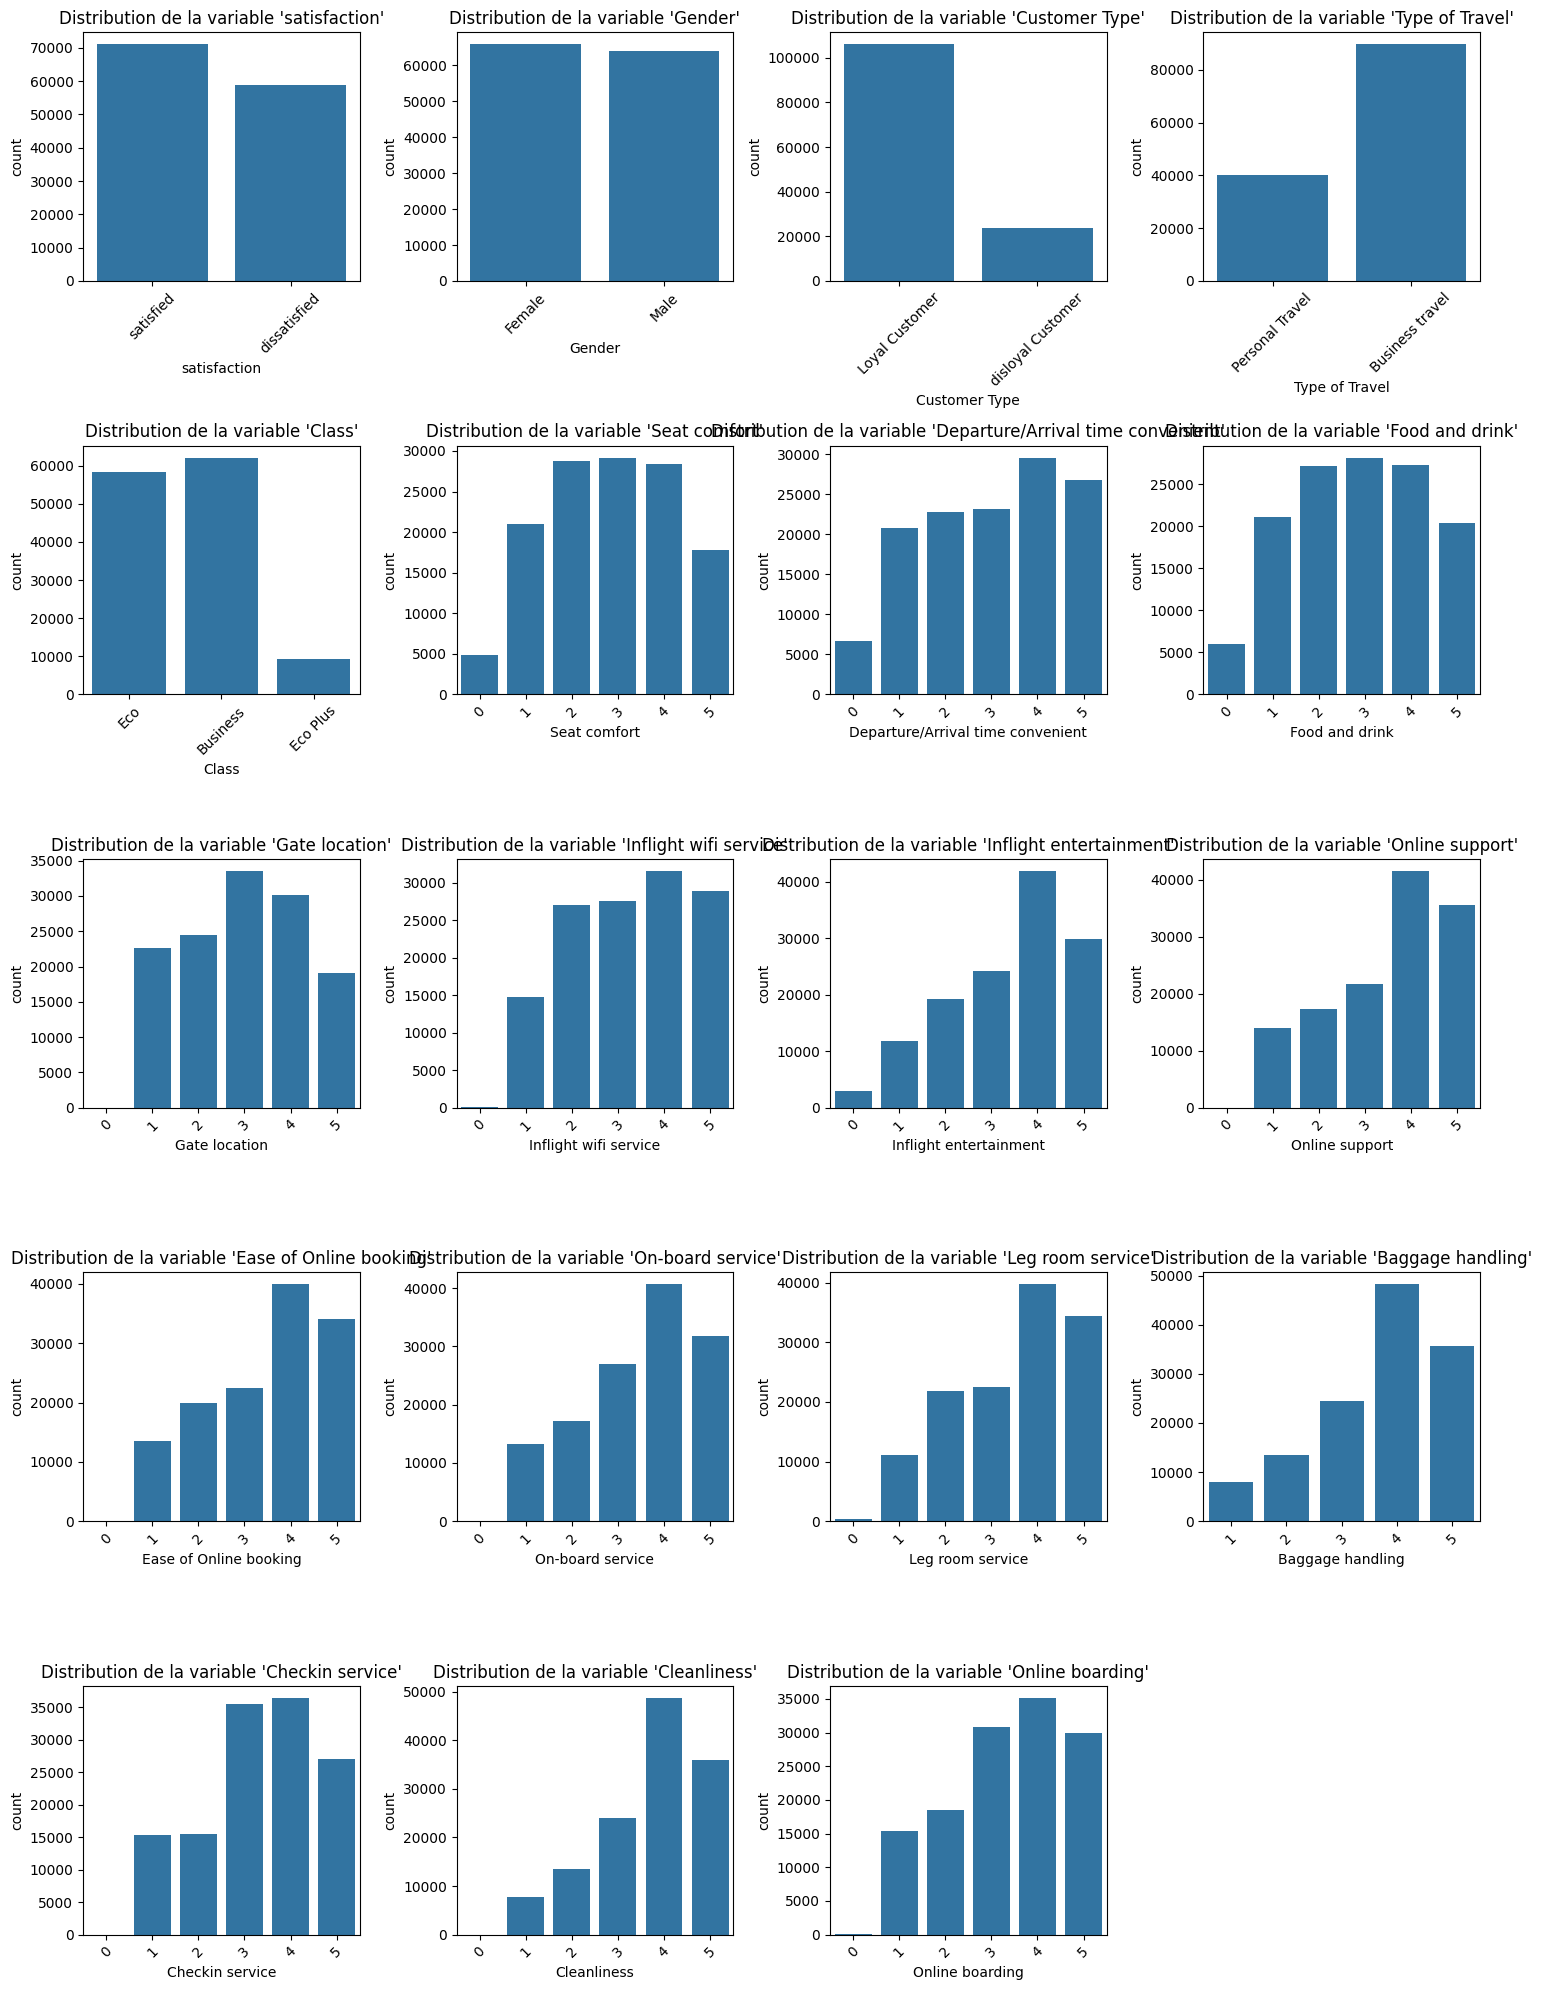

In [10]:
# Définir la taille de la figure pour chaque graphique
plt.figure(figsize=(15, 20))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)  
    sns.countplot(data=df, x=feature)
    plt.title(f"Distribution de la variable '{feature}'")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Partie 2

In [11]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [12]:
# Remplacer les valeurs manquantes pour la variable 'Arrival Delay in Minutes' par la moyenne
df.fillna({'Arrival Delay in Minutes': df['Arrival Delay in Minutes'].mean()}, inplace=True)


In [13]:
# Remplacer les valeurs pour les variables catégorielles par la valeur la plus fréquente
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0])

In [14]:
# Vérification après imputation ...
df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [15]:
# Identification des colonnes catégorielles
categorical_features = df.select_dtypes(include=['object']).columns

In [16]:
# Encodage One-Hot des variables catégorielles
df = pd.get_dummies(df, columns=categorical_features)

# Vérification des 5 premières lignes
df.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,satisfaction_satisfied,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,True,True,False,True,False,False,True,False,True,False
1,47,2464,0,0,0,3,0,2,2,3,...,True,False,True,True,False,False,True,True,False,False
2,15,2138,0,0,0,3,2,0,2,2,...,True,True,False,True,False,False,True,False,True,False
3,60,623,0,0,0,3,3,4,3,1,...,True,True,False,True,False,False,True,False,True,False
4,70,354,0,0,0,3,4,3,4,2,...,True,True,False,True,False,False,True,False,True,False


In [17]:
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes numériques
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Appliquer la standardisation
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Vérifier les données après standardisation
df[numerical_features].head()


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.691351,-1.671103,-2.037791,-1.95823,-1.975443,-0.758383,-0.947163,0.458022,-1.163181,-0.361613,-0.365962,-2.697605,-0.601544,1.316217,-0.612761,-1.041485,-0.386481,-0.392924
1,0.500820,0.469852,-2.037791,-1.95823,-1.975443,0.007334,-2.463679,-1.027802,-1.163181,-0.361613,0.420925,0.397840,0.263150,-1.063645,-0.612761,-1.041485,7.756204,7.548283
2,-1.615680,0.152458,-2.037791,-1.95823,-1.975443,0.007334,-0.947163,-2.513627,-1.163181,-1.127571,-0.365962,-0.376021,0.263150,0.522929,0.255469,-1.041485,-0.386481,-0.392924
3,1.360648,-1.322552,-2.037791,-1.95823,-1.975443,0.007334,-0.188905,0.458022,-0.397781,-1.893529,-1.939736,-2.697605,-2.330931,0.522929,-2.349219,-0.271490,-0.386481,-0.392924
4,2.022054,-1.584452,-2.037791,-1.95823,-1.975443,0.007334,0.569353,-0.284890,0.367620,-1.127571,-1.152849,-2.697605,-1.466238,0.522929,-1.480990,1.268500,-0.386481,-0.392924


## Interprétation des Valeurs Standardisées
- Valeur Négative (par exemple, -1.3343) :

Cela signifie que la valeur originale est en dessous de la moyenne de la distribution.
En particulier, une valeur de -1.3343 signifie que cette donnée est 1.3343 fois l'écart-type en dessous de la moyenne.
- Valeur Positive (par exemple, 0.554) :

Cela signifie que la valeur originale est au-dessus de la moyenne.
Une valeur de 0.554 signifie que la donnée est 0.554 fois l'écart-type au-dessus de la moyenne.
- Valeur Proche de 0 :

Cela signifie que la valeur est proche de la moyenne de la distribution.

## Partie 3

In [18]:
from sklearn.decomposition import PCA

X = df

In [19]:
X.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,satisfaction_satisfied,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1.691351,-1.671103,-2.037791,-1.95823,-1.975443,-0.758383,-0.947163,0.458022,-1.163181,-0.361613,...,True,True,False,True,False,False,True,False,True,False
1,0.500820,0.469852,-2.037791,-1.95823,-1.975443,0.007334,-2.463679,-1.027802,-1.163181,-0.361613,...,True,False,True,True,False,False,True,True,False,False
2,-1.615680,0.152458,-2.037791,-1.95823,-1.975443,0.007334,-0.947163,-2.513627,-1.163181,-1.127571,...,True,True,False,True,False,False,True,False,True,False
3,1.360648,-1.322552,-2.037791,-1.95823,-1.975443,0.007334,-0.188905,0.458022,-0.397781,-1.893529,...,True,True,False,True,False,False,True,False,True,False
4,2.022054,-1.584452,-2.037791,-1.95823,-1.975443,0.007334,0.569353,-0.284890,0.367620,-1.127571,...,True,True,False,True,False,False,True,False,True,False


In [20]:
# Instancier l'ACP avec 2 composantes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualiser la proportion de variance expliquée par chaque composante principale
print("Variance expliquée par chaque composante :\n", pca.explained_variance_ratio_)
print("Variance totale expliquée par les deux premières composantes :", sum(pca.explained_variance_ratio_))


Variance expliquée par chaque composante :
 [0.20407804 0.12548368]
Variance totale expliquée par les deux premières composantes : 0.32956171798056677


## Analyse en Composantes Principales (ACP)
Les deux premières composantes principales expliquent 33 % de la variance totale des données, indiquant une réduction de dimensionnalité significative. Cela peut suffire pour des visualisations ou des analyses exploratoires, mais des composantes supplémentaires pourraient être nécessaires pour capturer plus de variance dans les modèles prédictifs.

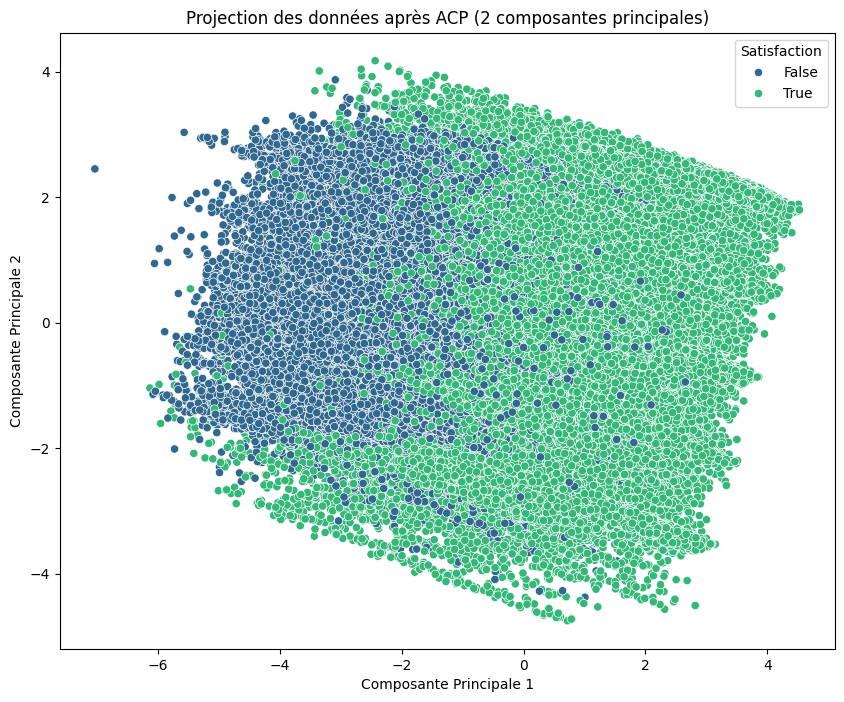

In [21]:
# Ajouter les composantes principales dans un DataFrame pour faciliter la visualisation
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Supposons que `df['satisfaction']` contient la variable cible (à adapter si nécessaire)
df_pca['satisfaction_satisfied'] = X['satisfaction_satisfied']

# Visualiser la projection en 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='satisfaction_satisfied', palette='viridis')
plt.title("Projection des données après ACP (2 composantes principales)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.legend(title="Satisfaction")
plt.show()


In [22]:
# Obtenir les composants (coefficients des variables d'origine dans les composantes principales)
components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print("Contribution des variables aux composantes principales :\n", components)

Contribution des variables aux composantes principales :
           Age  Flight Distance  Seat comfort  \
PC1  0.066440        -0.021735      0.215639   
PC2  0.000581        -0.013174      0.442892   

     Departure/Arrival time convenient  Food and drink  Gate location  \
PC1                           0.095355        0.146427       0.063040   
PC2                           0.459716        0.521830       0.458159   

     Inflight wifi service  Inflight entertainment  Online support  \
PC1               0.270363                0.294232        0.330978   
PC2              -0.112403                0.106614       -0.122834   

     Ease of Online booking  ...  satisfaction_satisfied  Gender_Female  \
PC1                0.405984  ...                0.151167       0.031122   
PC2               -0.147547  ...               -0.020165       0.002505   

     Gender_Male  Customer Type_Loyal Customer  \
PC1    -0.031122                      0.040751   
PC2    -0.002505                      0.

## Partie 4

In [23]:
from sklearn.model_selection import train_test_split

# Séparation des variables explicatives (X) et de la variable cible (y)
X = df.drop(columns=['satisfaction_satisfied'])
y = df['satisfaction_satisfied']

# Division du dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Régression linéaire

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instancier et entraîner le modèle de régression linéaire
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_lr = model_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Régression Linéaire :")
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Score R2 : {r2}")

Régression Linéaire :
Erreur quadratique moyenne (MSE) : 4.7191748878138285e-31
Score R2 : 1.0


### Régression Linéaire
Le modèle a atteint un score R² de 1.0 avec une MSE proche de zéro, indiquant une prédiction parfaite. Cela peut suggérer un surapprentissage (overfitting) ou la présence de fuites de données. Une validation rigoureuse avec un ensemble de test indépendant est conseillée.

- K-Nearest Neighbors (KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instancier et entraîner le modèle KNN avec k=5 (à ajuster pour l'optimisation)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors (KNN) :")
print(f"Précision : {accuracy_knn}")
print("Rapport de classification :\n", classification_report(y_test, y_pred_knn))



K-Nearest Neighbors (KNN) :
Précision : 0.9705112411456729
Rapport de classification :
               precision    recall  f1-score   support

       False       0.96      0.98      0.97     11675
        True       0.98      0.96      0.97     14301

    accuracy                           0.97     25976
   macro avg       0.97      0.97      0.97     25976
weighted avg       0.97      0.97      0.97     25976



### K-Nearest Neighbors (KNN)
Le modèle KNN initial a montré une précision de 97.05 %. Après optimisation, la précision a augmenté à 98.19 %, prouvant que l'ajustement des hyperparamètres a amélioré la généralisation du modèle. Les performances élevées indiquent une bonne robustesse

- Naïve Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

# Instancier et entraîner le modèle Naïve Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Prédictions et évaluation
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("\nNaïve Bayes :")
print(f"Précision : {accuracy_nb}")
print("Rapport de classification :\n", classification_report(y_test, y_pred_nb))


Naïve Bayes :
Précision : 1.0
Rapport de classification :
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     11675
        True       1.00      1.00      1.00     14301

    accuracy                           1.00     25976
   macro avg       1.00      1.00      1.00     25976
weighted avg       1.00      1.00      1.00     25976



### Naïve Bayes
Le modèle Naïve Bayes a atteint une précision parfaite de 100 % sur les données d'entraînement et de validation. Bien que cela semble idéal, de tels résultats peuvent indiquer un risque de surapprentissage. Il est nécessaire de tester le modèle sur des données nouvelles pour vérifier sa généralisation.

## Partie 5

In [27]:
from sklearn.model_selection import cross_val_score

# avec le modèle K-Nearest Neighbors (KNN)
scores_knn = cross_val_score(model_knn, X, y, cv=5, scoring='accuracy')
print("Scores de validation croisée pour KNN : ", scores_knn)
print("Précision moyenne pour KNN : ", scores_knn.mean())


Scores de validation croisée pour KNN :  [0.93732676 0.64324761 0.91588389 0.9394441  0.78349245]
Précision moyenne pour KNN :  0.8438789651986449


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model_lr = LinearRegression()

# Appliquer la validation croisée (par exemple, 5 plis)
scores_lr = cross_val_score(model_lr, X, y, cv=5, scoring='r2')

# Afficher les scores
print("Scores de validation croisée pour la régression linéaire (R2) :", scores_lr)
print("Score moyen (R2) :", scores_lr.mean())


Scores de validation croisée pour la régression linéaire (R2) : [1. 1. 1. 1. 1.]
Score moyen (R2) : 1.0


In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

model_nb = GaussianNB()

# Appliquer la validation croisée (par exemple, 5 plis)
scores_nb = cross_val_score(model_nb, X, y, cv=5, scoring='accuracy')  # Utilisation de la précision pour la classification

# Afficher les scores
print("\nScores de validation croisée pour Naïve Bayes (Précision) :", scores_nb)
print("Précision moyenne :", scores_nb.mean())



Scores de validation croisée pour Naïve Bayes (Précision) : [1. 1. 1. 1. 1.]
Précision moyenne : 1.0


In [28]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres pour KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Appliquer Grid Search avec validation croisée
grid_search_knn = GridSearchCV(model_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres pour KNN : ", grid_search_knn.best_params_)
print("Précision obtenue avec les meilleurs paramètres : ", grid_search_knn.best_score_)


Meilleurs paramètres pour KNN :  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Précision obtenue avec les meilleurs paramètres :  0.9784608835373284


In [31]:
# Répéter l’Optimisation pour d’Autres Modèles

from sklearn.linear_model import Ridge

# Définir une grille de paramètres pour la régression Ridge
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Appliquer Grid Search pour la régression Ridge
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, y_train)

print("Meilleur paramètre pour Ridge Regression : ", grid_search_ridge.best_params_)
print("Score R2 obtenu avec le meilleur paramètre : ", grid_search_ridge.best_score_)


Meilleur paramètre pour Ridge Regression :  {'alpha': 0.01}
Score R2 obtenu avec le meilleur paramètre :  0.9999999999995424


In [32]:
# Comparaison des Performances Avant et Après Optimisation
# Meilleur modèle KNN après optimisation
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)

print("\nPrécision de KNN après optimisation : ", accuracy_best_knn)



Précision de KNN après optimisation :  0.9819063751154912
